<a href="https://colab.research.google.com/github/nahid2553/Data-Mining/blob/main/Transfer%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

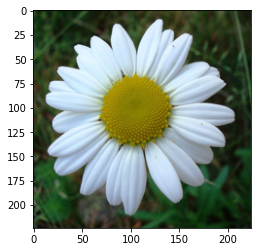

In [60]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])
image = Image.open("drive/MyDrive/colab/daisy.jpg").resize(IMAGE_SHAPE)
plt.imshow(image)

In [61]:
flower=np.array(image)/255
flower=flower[np.newaxis, ...]

result=classifier.predict(flower)
Max_result=np.argmax(result)

image_lables=[]
with open("drive/MyDrive/colab/Lebels.txt","r") as f:
  image_labels=f.read().splitlines()
image_labels[Max_result]

'daisy'

own model

In [62]:
result

array([[ 0.0414924 ,  0.36918694, -0.35020983, ...,  0.32452503,
         0.38953125, -0.3701288 ]], dtype=float32)

In [63]:
flower_folder=r"drive/MyDrive/colab/flower_photos"
catagories=['daisy','dandelion','roses','sunflowers','tulips',]

In [64]:
flower[np.newaxis, ...]

array([[[[[0.14509804, 0.33333333, 0.08235294],
          [0.14901961, 0.30588235, 0.09019608],
          [0.11764706, 0.25882353, 0.07058824],
          ...,
          [0.07843137, 0.10588235, 0.04313725],
          [0.07058824, 0.10588235, 0.04705882],
          [0.0627451 , 0.10588235, 0.05098039]],

         [[0.15294118, 0.34509804, 0.09019608],
          [0.16470588, 0.32941176, 0.10588235],
          [0.1372549 , 0.26666667, 0.08235294],
          ...,
          [0.09019608, 0.11372549, 0.05098039],
          [0.0745098 , 0.10196078, 0.04313725],
          [0.06666667, 0.10196078, 0.04705882]],

         [[0.16078431, 0.34509804, 0.09411765],
          [0.16470588, 0.32941176, 0.10980392],
          [0.16470588, 0.28235294, 0.10196078],
          ...,
          [0.09019608, 0.10196078, 0.04705882],
          [0.07843137, 0.09803922, 0.04313725],
          [0.0745098 , 0.09803922, 0.05098039]],

         ...,

         [[0.3254902 , 0.37254902, 0.27843137],
          [0.21568627,

In [65]:
data

[[array([[[107, 141, 134],
          [103, 132, 125],
          [101, 122, 117],
          ...,
          [106, 109, 109],
          [109, 111, 111],
          [109, 111, 111]],
  
         [[ 32,  65,  58],
          [ 29,  58,  51],
          [ 29,  50,  45],
          ...,
          [ 21,  22,  22],
          [ 22,  22,  22],
          [ 22,  22,  22]],
  
         [[ 18,  51,  44],
          [ 18,  45,  39],
          [ 20,  40,  35],
          ...,
          [ 10,  12,  12],
          [  5,   7,   7],
          [  5,   7,   7]],
  
         ...,
  
         [[241, 243, 243],
          [243, 244, 244],
          [247, 247, 247],
          ...,
          [229, 235, 236],
          [224, 236, 236],
          [208, 221, 221]],
  
         [[248, 248, 248],
          [248, 248, 248],
          [247, 247, 247],
          ...,
          [203, 209, 209],
          [219, 229, 229],
          [233, 242, 242]],
  
         [[248, 248, 248],
          [248, 248, 248],
          [247, 247, 247

In [66]:
import random
random.shuffle(data)
x=[]
y=[]
for feature,label in data :
  x.append(feature)
  y.append(label)

x=np.array(x)
y=np.array(y)

x=x/255
x

array([[[[0.36470588, 0.38431373, 0.41960784],
         [0.36862745, 0.38823529, 0.42352941],
         [0.37254902, 0.39215686, 0.43137255],
         ...,
         [0.45490196, 0.49019608, 0.52941176],
         [0.44313725, 0.47843137, 0.51764706],
         [0.44313725, 0.47843137, 0.51764706]],

        [[0.36862745, 0.38823529, 0.42352941],
         [0.36862745, 0.38823529, 0.42352941],
         [0.37647059, 0.39607843, 0.43137255],
         ...,
         [0.45490196, 0.49411765, 0.53333333],
         [0.44313725, 0.47843137, 0.51764706],
         [0.44313725, 0.47843137, 0.51764706]],

        [[0.37254902, 0.38823529, 0.42352941],
         [0.37254902, 0.39215686, 0.42745098],
         [0.37647059, 0.39607843, 0.43137255],
         ...,
         [0.45882353, 0.49803922, 0.5372549 ],
         [0.44705882, 0.48235294, 0.52156863],
         [0.44705882, 0.48235294, 0.52156863]],

        ...,

        [[0.36470588, 0.48627451, 0.57647059],
         [0.36470588, 0.48627451, 0.57647059]

In [67]:
x.shape

(41, 224, 224, 3)

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [69]:
previous_model=hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    input_shape=IMAGE_SHAPE+(3,),
    trainable=False
)

In [70]:
number_of_flower=5
model = tf.keras.Sequential([
                 previous_model,
                 tf.keras.layers.Dense(number_of_flower)          
])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_12 (KerasLayer)  (None, 1280)              2257984   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [71]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 1.7726 - acc: 0.1333
Epoch 2/5
1/1 [==============================] - 1s 704ms/step - loss: 1.5013 - acc: 0.3333
Epoch 3/5
1/1 [==============================] - 1s 682ms/step - loss: 1.2753 - acc: 0.5000
Epoch 4/5
1/1 [==============================] - 1s 692ms/step - loss: 1.0837 - acc: 0.5667
Epoch 5/5
1/1 [==============================] - 1s 710ms/step - loss: 0.9180 - acc: 0.6667


In [72]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 1s 842ms/step - loss: 1.0064 - acc: 0.6364


[1.0064259767532349, 0.6363636255264282]